name: Eklavya Gupta

university: University of Petroleum and Energy Studies

course: B.Tech CSE AI ML   # currently in 5th semester

sapid: 500093960

university mail id: 500093960@stu.upes.ac.in

personal mail id: emessage.eg@gmail.com

In [56]:
# name: Eklavya Gupta
# university: University of Petroleum and Energy Studies
# course: B.Tech CSE AI ML   # currently in 5th semester
# sapid: 500093960
# university mail id: 500093960@stu.upes.ac.in
# personal mail id: emessage.eg@gmail.com

import numpy as np
from torchvision import transforms
from matplotlib import pyplot as plt
import torch
import os
import cv2
from PIL import Image
from torchvision.models import resnet18
from PIL import ImageDraw
from torch import nn

In [64]:
def modelLoader(modelPath:str = os.path.join(os.getcwd(), 'Models', 'model_epoch_33.pth')):
    model = resnet18(pretrained = True)
    model.fc = nn.Sequential(
        nn.Linear(model.fc.in_features, 512),
        nn.ReLU(),
        nn.Linear(512, 3),
        nn.LogSoftmax(dim = 1))
    loadModel = torch.load(modelPath)
    model.load_state_dict(loadModel)
    return model


def predict(image:Image, model):
    transform = transforms.Compose([transforms.Resize((300, 300)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])
    image = transform(image)
    image = image.unsqueeze(0)
    model.eval()
    with torch.no_grad():
        output = model(image)
        probabilities = torch.exp(output)
        return probabilities




def slidingWindowsDtection(imageDir:str, size:list = [tuple], stride:list = [tuple], startingStride:list = [tuple], decisionParameter:float = 0.90,show:bool = True, savingDir:str = ''):
    for i in range(len(stride)):
        image = Image.open(imageDir)
        img = image.copy()
        model = modelLoader(modelPath = os.path.join(os.getcwd(), 'Models', 'model_epoch_33.pth'))
        # x, y = int(img.shape[1]/size[0]), int(img.shape[0]/size[1])
        try:
            sSW, sSH = startingStride[i]
        except:
            sSW, sSH = 0, 0
        x, y = sSW, sSH
        while y+size[i][1]+stride[i][1] < img.size[1]:
            while x+size[i][0]+stride[i][0] < img.size[0]:
                pred = predict(image.crop((x, y, x+size[i][0], y+size[i][1])), model = model)
                pred = pred.squeeze().tolist()
                prob = pred[np.argmax(pred)]
                pred = np.argmax(pred)
                if pred == 1 and prob > decisionParameter:
                    draw = ImageDraw.Draw(img)
                    draw.rectangle((x, y, x+size[i][0], y+size[i][1]), outline='black', width = 5)
                if pred == 2 and prob > decisionParameter:
                    draw = ImageDraw.Draw(img)
                    draw.rectangle((x, y, x+size[i][0], y+size[i][1]), outline='blue', width = 5)
                if show:
                    imgCV2 = img.copy()
                    draw = ImageDraw.Draw(imgCV2)
                    draw.rectangle((x, y, x+size[i][0], y+size[i][1]), outline='red', width=2)
                    imgCV2 = np.array(imgCV2)
                    imgCV2 = cv2.cvtColor(imgCV2, cv2.COLOR_RGB2BGR)
                    cv2.imshow('image', imgCV2)
                    cv2.waitKey(1)
                x += stride[i][0]
            x = sSW
            y += stride[i][1]
            if y+size[i][1]+stride[i][1] > img.size[1] and show == True:
                cv2.destroyAllWindows()
        try:
            img = np.array(img)
            plt.imsave(savingDir, img)
        except:
            print('File is not saved')
        plt.imshow(img)
        plt.show()

C:\Users\EKLAVYA\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\EKLAVYA\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


File is not saved


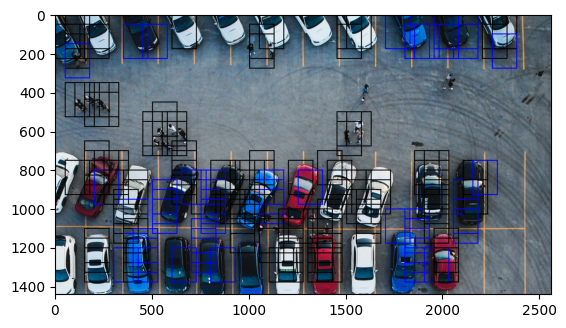

File is not saved


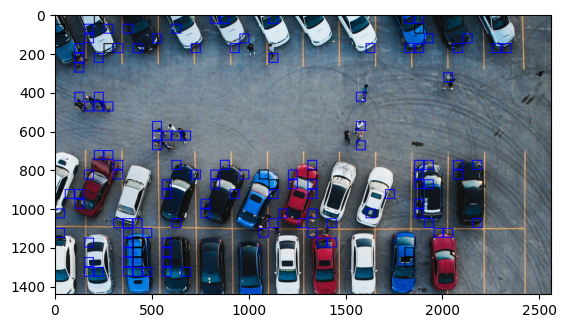

In [65]:
slidingWindowsDtection(imageDir = os.path.join(os.getcwd(), 'ML task dataset', 'car14.jpg'), size = [(130, 180), (50, 50)], stride = [(50, 50), (50, 50)], decisionParameter=0.95)

File is not saved


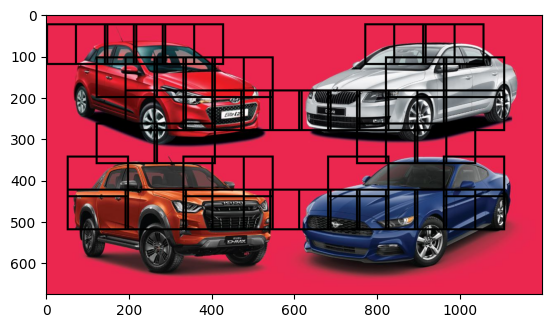

In [71]:
slidingWindowsDtection(imageDir = os.path.join(os.getcwd(), 'ML task dataset', 'car7.jpg'), size = [(150, 100)], stride = [(70, 80)], decisionParameter=0.95, startingStride=[(50, 20)])